In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from pycbc.waveform import get_td_waveform

20 10.0



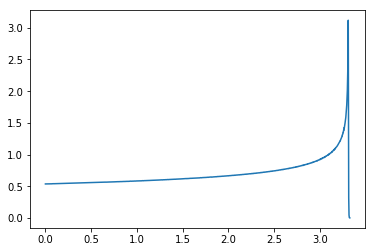

In [2]:
f = 20
apx = 'SEOBNRv2'
m1_range = np.arange(20,30,1)
ratio_range = np.arange(0.5,3,0.2)

# m1_range = np.arange(20,21,1)
# ratio_range = np.arange(0.5,0.7,0.2)

for m1 in m1_range:
    for ratio in ratio_range:
        m2 = ratio*m1
        print(m1,m2)
        print("")
        # Generate Python data
        hp, hc = get_td_waveform(approximant=apx,
                                     mass1=m1,
                                     mass2=m2,
                                     delta_t=1.0/4096,
                                     f_lower=f)
        curve = np.column_stack((hp.sample_times,hp*10**19))
        curve[:,0] = curve[:,0]-curve[:,0][0]
        # plt.plot(curve[:,0],curve[:,1])

        # Get the phase
        x_sim = curve[:,0]
        y = curve[:,1]

        zeros = []
        cs = CubicSpline(x_sim,y)
        x_phi = np.arange(np.round(min(x_sim),3),np.round(max(x_sim)+0.00001,3),0.00001)
        y_phi = cs(x_phi)
        for j in range(len(x_phi)-1):#,int(96/100*len(x))):
            if y_phi[j]*y_phi[j+1]<0:
                zeros = zeros + [x_phi[j]]
        pis = np.arange(0,len(zeros),1)*np.pi

        cs_phase = CubicSpline(zeros,pis)
        yy_phi = cs_phase(x_sim)

        ##############################################################################################################   
        # Get the amplitude
        A = y/np.sin(yy_phi)

        # Get rid of infinties in the amplitude
        idx = np.where(abs(np.sin(yy_phi))>0.5)
        x = x_sim[idx]
        y = y[idx]
        A = A[idx]
        yy_phi = yy_phi[idx]

        cs_amplitude = CubicSpline(x,A)

        # Keep just 1000 equally spaced points
        x_max = x[np.argmax(y)]
        # x1 = np.linspace(min(x),x_max-250,1000)
        # x2 = np.linspace(x_max-250,x_max+250,500)
        x = np.linspace(min(x),max(x),2000)

        yy_phi = cs_phase(x)
        A = cs_amplitude(x)
        
        plt.plot(x,A)
        break
    break
#         ##############################################################################################################   

#         # plt.plot(x_sim,yy_phi)

#         # Get analytic parameters
#         t_star = 4.92*10**(-6)
#         w = f*2*np.pi*t_star

#         t0 = (5/4**(8/3)*w**(-8/3)*(m1+m2)**(1/3)/(m1*m2))*t_star 
#         # print(t0)
#         def theta(m1,m2,t):
#             return 2*(5/256)**(3/8)*(m1+m2)**(1/8)/(m1*m2)**(3/8)*(-8/5*((t0-t)/t_star)**(5/8))

#         good_x = x-x[-1]
#         good_y_analytic = theta(m1,m2,x_sim)-theta(m1,m2,x_sim)[0]-max(theta(m1,m2,x_sim)-theta(m1,m2,x_sim)[0])
#         good_y_python = yy_phi-max(theta(m1,m2,x_sim)-theta(m1,m2,x_sim)[0])
#         m_1 = np.ones(len(good_x))*m1
#         m_2 = np.ones(len(good_x))*m2

# #         analytic_data = np.column_stack((m_1,m_2,good_x,good_y_analytic))
# #         python_data = np.column_stack((m_1,m_2,good_x,good_y_python))
#         amplitude_data = np.column_stack((m_1,m_2,good_x,A))

# #         np.savetxt("phase_data/analytic_data_%s_%s.txt" %(m1,m2), analytic_data)
# #         np.savetxt("phase_data/python_data_%s_%s.txt" %(m1,m2), python_data)
#         np.savetxt("amplitude_data/python_data_%s_%s.txt" %(m1,ratio), amplitude_data)